In [1]:
# # example of loading the mnist dataset
# from keras.datasets import mnist
from matplotlib import pyplot
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import cv2
import os
import numpy as np

In [2]:
labels = ['BrownSpot', 'Healthy','Hispa','LeafBlast']
img_size = 100
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        i=0
        for img in os.listdir(path):
            i=i+1
            try:
                img_arr = cv2.imread(os.path.join(path, img)) #convert BGR to RGB format [...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
            if i == 10:
                break
    return np.array(data)

In [3]:
# load dataset
train = get_data('C:\\Users\\Thilina_Chathuranga\\Documents\\1PL\\Research\\Gihan\\DataSet\\RiceDiseaseDataset\\train')
val = get_data('C:\\Users\\Thilina_Chathuranga\\Documents\\1PL\\Research\\Gihan\\DataSet\\RiceDiseaseDataset\\validation')

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)


<ipython-input-2-4ff3eb855108>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [4]:
trainX = np.array(x_train)
trainY = np.array(y_train)
testX = np.array(x_val)
testY = np.array(y_val)

In [5]:
single_ch_trainX = np.array([[]])
for i in range(len(trainX)):
    single_ch_trainX = np.append(single_ch_trainX, trainX[i,:img_size,:img_size,0])

single_ch_testX = np.array([[]])
for i in range(len(testX)):
    single_ch_testX = np.append(single_ch_testX, testX[i,:img_size,:img_size,0])

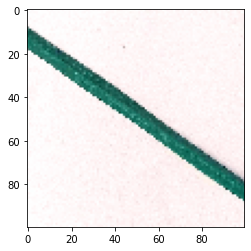

In [6]:
# trainX[0][:img_size,:img_size]

import matplotlib.pyplot as plt

plt.imshow(trainX[0][:img_size,:img_size])


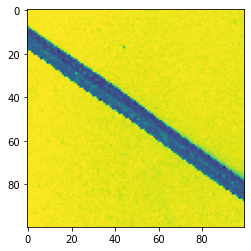

In [8]:
gray = cv2.cvtColor(trainX[0][:img_size,:img_size], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [26]:
# load dataset
# (trainX, trainY), (testX, testY) = mnist.load_data()

# reshape dataset to have a single channel
trainX = single_ch_trainX.reshape((trainX.shape[0], img_size, img_size, 1)) # 1 means 
testX = single_ch_testX.reshape((testX.shape[0], img_size, img_size, 1))

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [27]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [28]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy']) #optimizer=opt
    return model

In [30]:
# define model
model = define_model()
# select rows for train and test
# fit model
history = model.fit(train_norm, trainY, epochs=50, batch_size=100, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(test_norm, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/50
8/8 [==============================] - 4s 546ms/step - loss: 5.0634 - accuracy: 0.2338 - val_loss: 46.0386 - val_accuracy: 0.2541
Epoch 2/50
8/8 [==============================] - 4s 506ms/step - loss: 1.4947 - accuracy: 0.2425 - val_loss: 101.4878 - val_accuracy: 0.2500
Epoch 3/50
8/8 [==============================] - 4s 514ms/step - loss: 1.4312 - accuracy: 0.2450 - val_loss: 166.1628 - val_accuracy: 0.2500
Epoch 4/50
8/8 [==============================] - 4s 499ms/step - loss: 1.4431 - accuracy: 0.2525 - val_loss: 43.3612 - val_accuracy: 0.2866
Epoch 5/50
8/8 [==============================] - 4s 498ms/step - loss: 1.3703 - accuracy: 0.3212 - val_loss: 46.5164 - val_accuracy: 0.3191
Epoch 6/50
8/8 [==============================] - 4s 497ms/step - loss: 1.3675 - accuracy: 0.2925 - val_loss: 63.0825 - val_accuracy: 0.2967
Epoch 7/50
8/8 [==============================] - 4s 509ms/step - loss: 1.3386 - accuracy: 0.3338 - val_loss: 55.3288 - val_accuracy: 0.3638
Epoch 8/50


KeyboardInterrupt: 